In [1]:
!pip install tensorflow-gpu

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [4]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
!unzip ECG5000.zip

--2021-04-15 19:09:54--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip.1’

ECG5000.zip.1       100%[===================>]  10.12M  6.46MB/s    in 1.6s    

2021-04-15 19:09:56 (6.46 MB/s) - ‘ECG5000.zip.1’ saved [10614407/10614407]

Archive:  ECG5000.zip
replace ECG5000.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [18]:

!ls -alrt

total 58192
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip.1
-rw-r--r-- 1 root root 10614407 Aug  9  2019 ECG5000.zip
-rw-r--r-- 1 root root       38 Aug  9  2019 ECG5000.txt
-rw-r--r-- 1 root root  7086857 Aug  9  2019 ECG5000_TEST.arff
-rw-r--r-- 1 root root  1128500 Aug  9  2019 ECG5000_TRAIN.txt
-rw-r--r-- 1 root root   790229 Aug  9  2019 ECG5000_TRAIN.arff
-rw-r--r-- 1 root root 10156500 Aug  9  2019 ECG5000_TEST.txt
-rw-r--r-- 1 root root  7083409 Aug  9  2019 ECG5000_TEST.ts
-rw-r--r-- 1 root root   786781 Aug  9  2019 ECG5000_TRAIN.ts
drwxr-xr-x 4 root root     4096 Apr  7 13:35 .config
drwxr-xr-x 1 root root     4096 Apr  7 13:36 sample_data
drwxr-xr-x 1 root root     4096 Apr 15 17:35 ..
drwxr-xr-x 1 root root     4096 Apr 15 19:09 .
-rw-r--r-- 1 root root 11285000 Apr 15 19:13 ecg_final.txt


In [19]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [ ]:
df=pd.read_csv('ecg_final.txt', sep='  ', header=None)

In [20]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,...,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,...,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,...,1.640105,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,...,1.553079,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,...,0.982230,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.1

In [21]:
df = df.add_prefix('c')

In [22]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=111)

In [23]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [24]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [25]:
normal_train_data= pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [26]:
normal_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [27]:
normal_train_dataNoise = np.random.normal(loc=0.5, scale=0.5, size=normal_train_data.shape)
normal_test_dataNoise = np.random.normal(loc=0.5, scale=0.5, size=normal_test_data.shape)
normal_trainX_dataNoise = np.clip(normal_train_data + normal_train_dataNoise, 0, 1)
normal_testX_dataNoise = np.clip(normal_test_data + normal_test_dataNoise, 0, 1)

In [30]:
anomaly_train_dataNoise = np.random.normal(loc=0.5, scale=0.5, size=anomaly_train_data.shape)
anomaly_test_dataNoise = np.random.normal(loc=0.5, scale=0.5, size=anomaly_test_data.shape)
anomaly_trainX_dataNoise =np.clip(anomaly_train_dataNoise + anomaly_train_data, 0, 1)
anomaly_testX_dataNoise = np.clip(anomaly_test_dataNoise + anomaly_test_data, 0, 1)

In [36]:
train_data_scaled_Noise = np.random.normal(loc=0.5, scale=0.5, size=train_data_scaled.shape)
test_data_scaled_Noise = np.random.normal(loc=0.5, scale=0.5, size=test_data_scaled.shape)
trainX_data_scaled_Noise = np.clip(train_data_scaled_Noise + train_data_scaled, 0, 1)
testX_data_scaled_Noise = np.clip(test_data_scaled_Noise + test_data_scaled, 0, 1)

In [37]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [40]:
model= AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10,
                                                    mode='min')

model.compile(optimizer='adam', loss='mae')

In [41]:
history = model.fit(normal_trainX_dataNoise, normal_train_data, 
          epochs=50, 
          batch_size=128,
          validation_data=(trainX_data_scaled_Noise[:,1:], train_data_scaled[:,1:]),
          shuffle=True,
          callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 1s 12ms/step - loss: 0.1348 - val_loss: 0.1125
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0928 - val_loss: 0.0821
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0566 - val_loss: 0.0779
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0488 - val_loss: 0.0771
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0481 - val_loss: 0.0772
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0481 - val_loss: 0.0765
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0484 - val_loss: 0.0770
Epoch 8/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0489 - val_loss: 0.0763
Epoch 9/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0473 - val_loss: 0.0765
Epoch 10/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0489 - val_loss: 0.0766
Epoch 11/50
19/19 

In [42]:
encoder_out = model.encoder(normal_testX_dataNoise).numpy()
decoder_out = model.decoder(encoder_out).numpy()

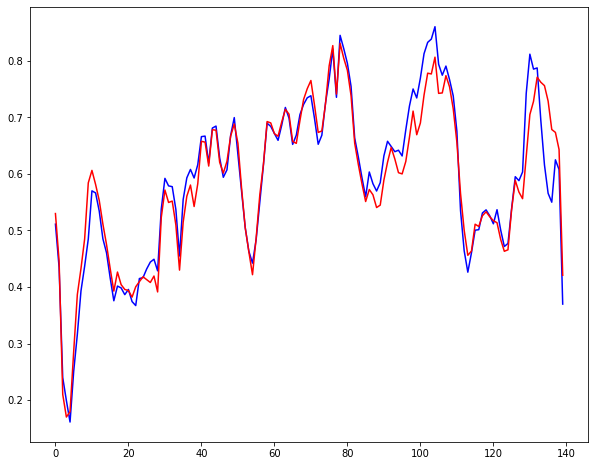

In [46]:

plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [47]:
encoder_out_a = model.encoder(anomaly_testX_dataNoise).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

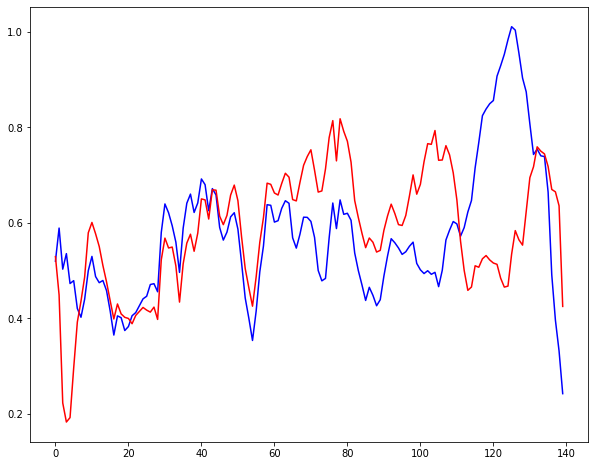

In [48]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

(array([ 4., 17., 58., 56., 66., 67., 41., 33., 29., 31., 31., 25., 13.,
        17.,  6.,  4., 12.,  6.,  2.,  3.,  3.,  4.,  5.,  2.,  0.,  2.,
         0.,  0.,  3.,  4.,  0.,  1.,  1.,  3.,  1.,  2.,  0.,  1.,  1.,
         2.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  2.]),
 array([0.01226131, 0.01608775, 0.01991418, 0.02374061, 0.02756704,
        0.03139347, 0.03521991, 0.03904634, 0.04287277, 0.0466992 ,
        0.05052563, 0.05435207, 0.0581785 , 0.06200493, 0.06583136,
        0.06965779, 0.07348423, 0.07731066, 0.08113709, 0.08496352,
        0.08878995, 0.09261639, 0.09644282, 0.10026925, 0.10409568,
        0.10792211, 0.11174855, 0.11557498, 0.11940141, 0.12322784,
        0.12705428, 0.13088071, 0.13470714, 0.13853357, 0.14236   ,
        0.14618644, 0.15001287, 0.1538393 , 0.15766573, 0.16149216,
        0.1653186 , 0.16914503, 0.17297146, 0.17679789, 0.18062432,
        0.18445076, 0.18827719, 0.19210362, 0.19593005, 0.19975648,
        0.20358292]),
 <a list of 50

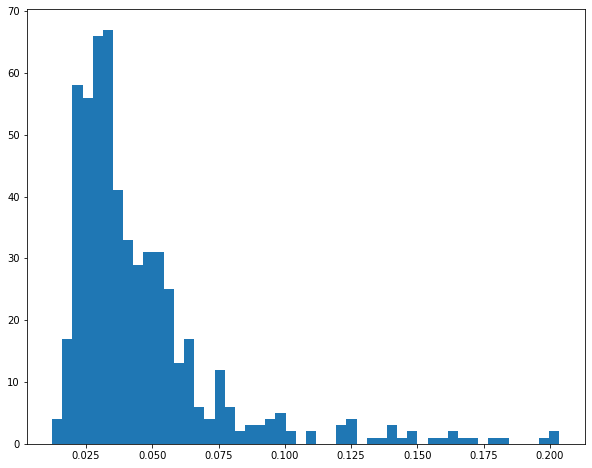

In [49]:

reconstructions = model.predict(normal_testX_dataNoise)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

plt.hist(train_loss, bins=50)

In [50]:
np.mean(train_loss)

0.04591665004357414

In [51]:
np.std(train_loss)

0.029755068074325795

In [52]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

(array([ 1.,  0.,  0.,  1.,  3.,  2.,  1.,  0.,  4.,  9., 12., 14., 14.,
        26., 29., 44., 46., 47., 51., 32., 29., 14., 22.,  9.,  6.,  2.,
         2.,  1.,  1.,  3.,  3.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.05147207, 0.05522633, 0.05898059, 0.06273486, 0.06648912,
        0.07024338, 0.07399764, 0.0777519 , 0.08150616, 0.08526042,
        0.08901469, 0.09276895, 0.09652321, 0.10027747, 0.10403173,
        0.10778599, 0.11154025, 0.11529451, 0.11904878, 0.12280304,
        0.1265573 , 0.13031156, 0.13406582, 0.13782008, 0.14157434,
        0.14532861, 0.14908287, 0.15283713, 0.15659139, 0.16034565,
        0.16409991, 0.16785417, 0.17160844, 0.1753627 , 0.17911696,
        0.18287122, 0.18662548, 0.19037974, 0.194134  , 0.19788826,
        0.20164253, 0.20539679, 0.20915105, 0.21290531, 0.21665957,
        0.22041383, 0.22416809, 0.22792236, 0.23167662, 0.23543088,
        0.23918514]),
 <a list of 50

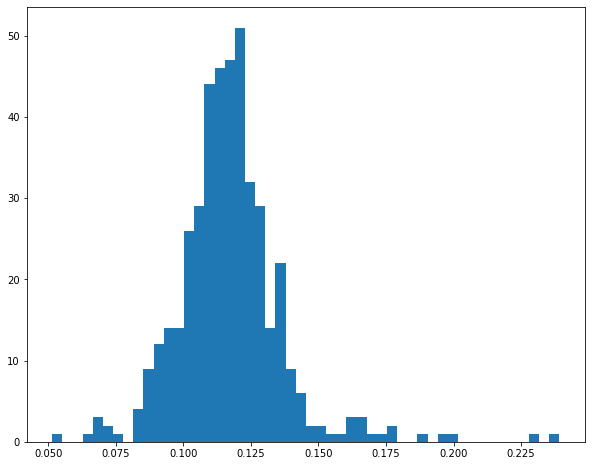

In [53]:
reconstructions_a = model.predict(anomaly_testX_dataNoise)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

plt.hist(train_loss_a, bins=50)

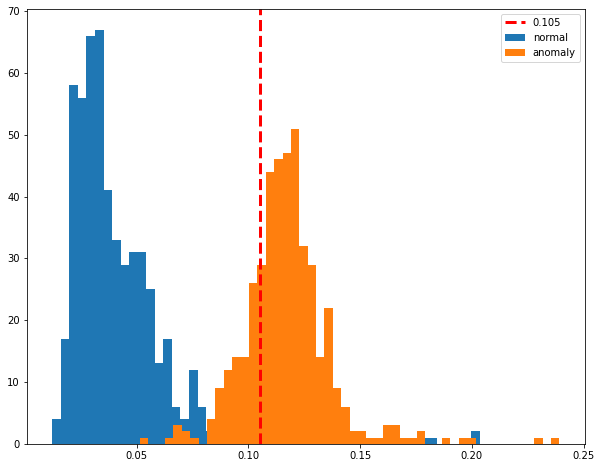

In [54]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [55]:
np.mean(train_loss_a)

0.11722944446687308

In [56]:

np.std(train_loss_a)

0.01978064507886626

In [57]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [58]:
preds = tf.math.less(train_loss, threshold)

In [59]:

tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=535>

In [60]:
preds.shape

TensorShape([563])

In [62]:

preds_a = tf.math.greater(train_loss_a, threshold)

In [63]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=344>

In [64]:
preds_a.shape

TensorShape([437])